In [1]:
import matplotlib
import matplotlib.style as mplstyle
mplstyle.use('fast')
# matplotlib.use('agg')

In [2]:
%time import shnitsel.dynamic.datasheet
D = shnitsel.dynamic.datasheet

CPU times: user 6.07 s, sys: 511 ms, total: 6.58 s
Wall time: 6.19 s


In [3]:
sheet = D.Datasheet(path='/nc/Theo_SHNITSEL/filtered/traj_C2H4_noS2.nc', spectra_times=[0, 10, 20, 30])

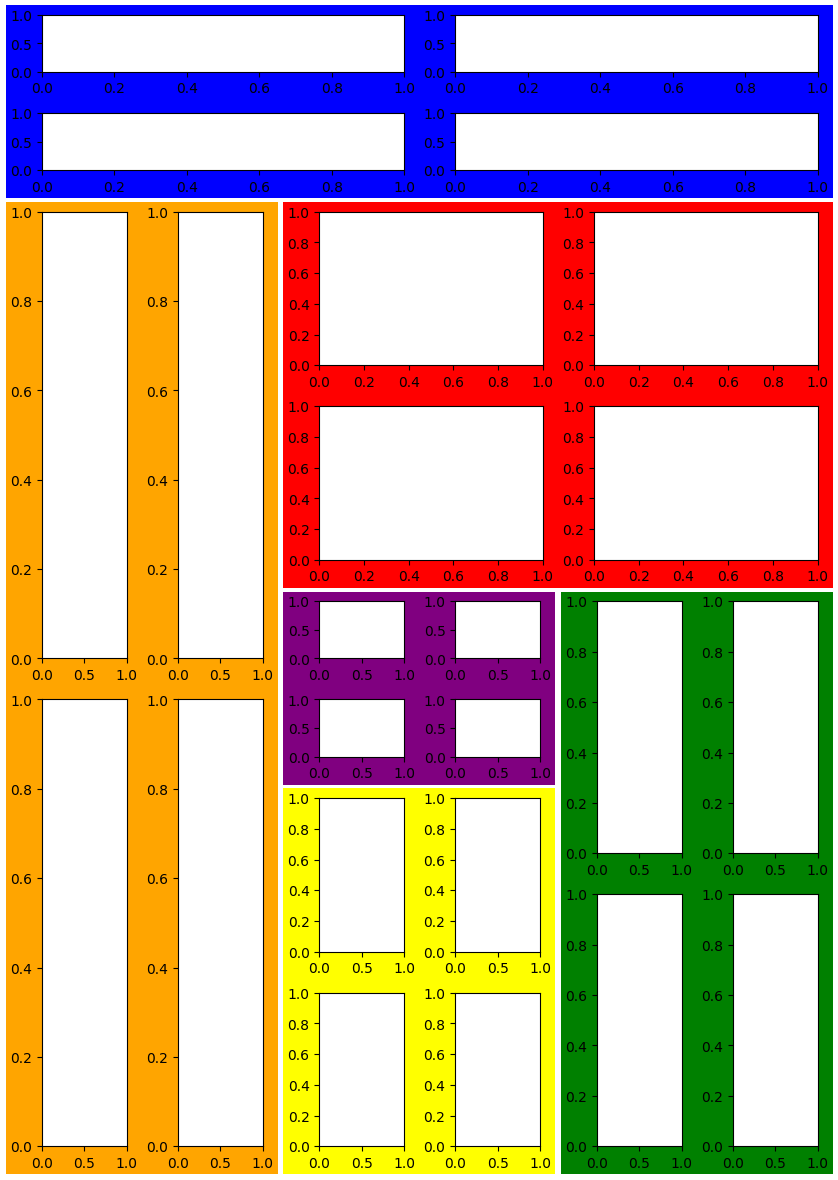

In [4]:
sheet._test_subfigures(include_per_state_hist=True)

In [4]:
sheet.calc_all()

In [7]:
import pickle
with open('/tmp/ethene.plk', 'wb') as fout:
    pickle.dump(sheet, fout, protocol=pickle.HIGHEST_PROTOCOL)

After restart

In [2]:
import pickle
with open('/tmp/ethene.plk', 'rb') as fin:
    sheet = pickle.load(fin)

C=C InChI=1S/C2H4/c1-2/h1-2H2


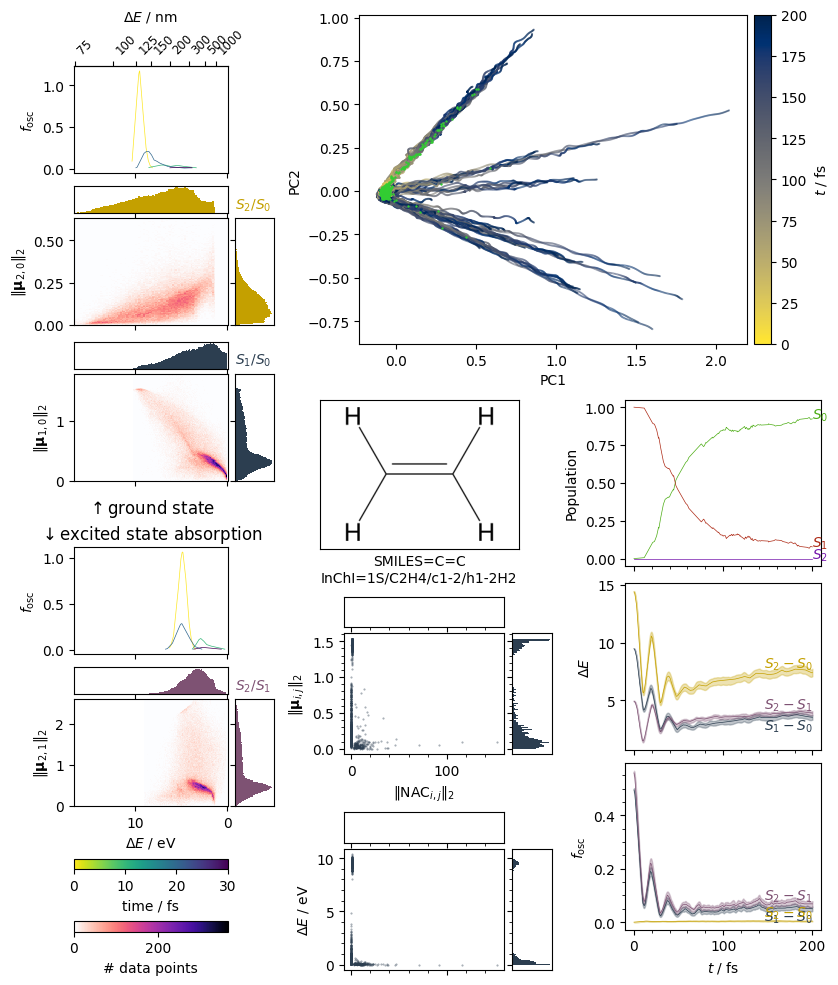

In [5]:
fig = sheet.plot()

In [7]:
fig.savefig('/tmp/ethene.png')

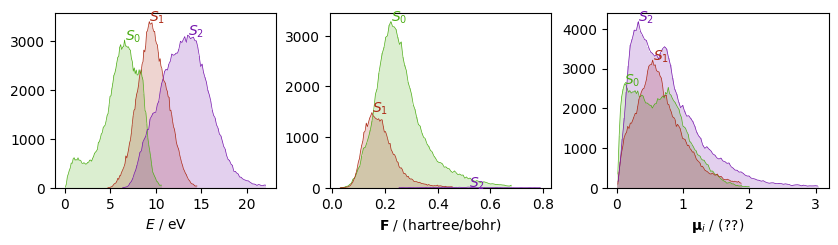

In [3]:
sheet.plot_per_state_histograms()

{'pop': <Axes: label='pop', ylabel='Population'>,
 'de': <Axes: label='de', ylabel='$\\Delta E$'>,
 'ft': <Axes: label='ft', xlabel='$t$ / fs', ylabel='$f_\\mathrm{osc}$'>}

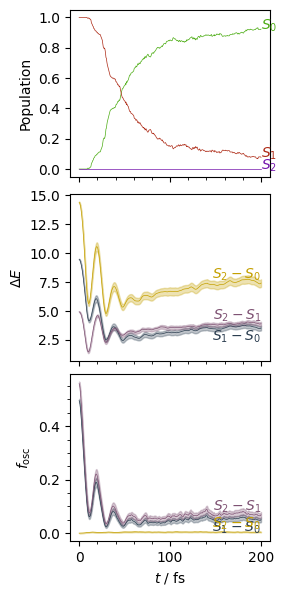

In [3]:
sheet.plot_timeplots()

{'sg': <Axes: label='sg', ylabel='$f_\\mathrm{osc}$'>,
 't0': <Axes: label='t0', ylabel='$\\|\\mathbf{\\mu}_{2,0}\\|_2$'>,
 't1': <Axes: label='t1', ylabel='$\\|\\mathbf{\\mu}_{1,0}\\|_2$'>,
 'se': <Axes: label='se', title={'center': '$\\uparrow$ground state\n$\\downarrow$excited state absorption'}, ylabel='$f_\\mathrm{osc}$'>,
 't2': <Axes: label='t2', xlabel='$\\Delta E$ / eV', ylabel='$\\|\\mathbf{\\mu}_{2,1}\\|_2$'>,
 'cb_spec': <Axes: label='cb_spec', xlabel='time / fs'>,
 'cb_hist': <Axes: label='cb_hist', xlabel='# data points'>}

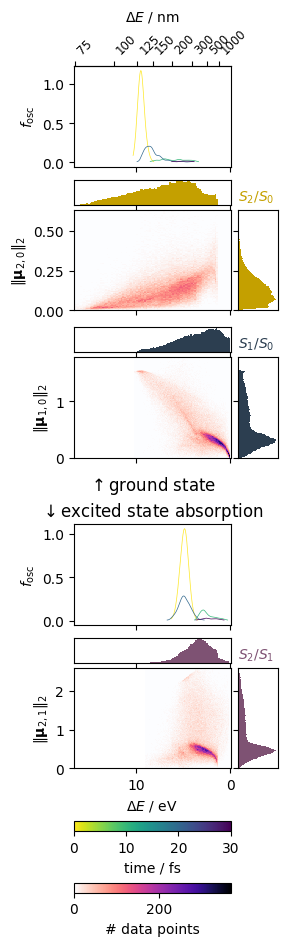

In [3]:
sheet.plot_separated_spectra_and_hists()

In [4]:
sheet.plot()

AttributeError: 'Datasheet' object has no attribute 'plot'

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
# fig.subplots(2,2)
fig.add_subfigure()

TypeError: FigureBase.add_subfigure() missing 1 required positional argument: 'subplotspec'

<Figure size 640x480 with 0 Axes>

{'sg': <Axes: label='sg', ylabel='$f_\\mathrm{osc}$'>,
 't0': <Axes: label='t0', ylabel='$\\|\\mathbf{\\mu}_{2,0}\\|_2$'>,
 't1': <Axes: label='t1', ylabel='$\\|\\mathbf{\\mu}_{1,0}\\|_2$'>,
 'se': <Axes: label='se', title={'center': '$\\uparrow$ground state\n$\\downarrow$excited state absorption'}, ylabel='$f_\\mathrm{osc}$'>,
 't2': <Axes: label='t2', xlabel='$\\Delta E$ / eV', ylabel='$\\|\\mathbf{\\mu}_{2,1}\\|_2$'>,
 'cb_spec': <Axes: label='cb_spec', xlabel='time / fs'>,
 'cb_hist': <Axes: label='cb_hist', xlabel='# data points'>}

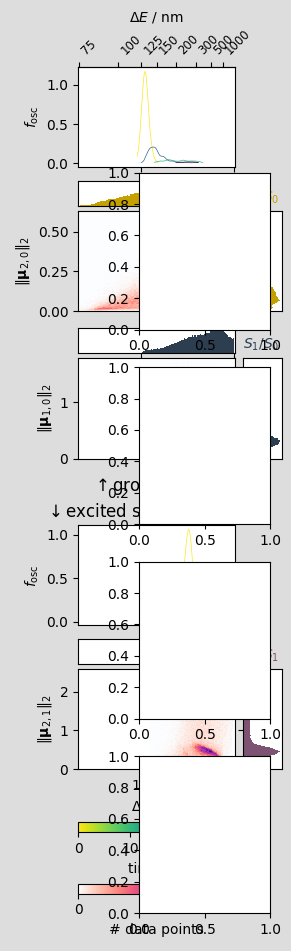

In [3]:
import matplotlib.pyplot as plt
include_hist = borders = True
nrows = 6 if include_hist else 5
s = 1 if include_hist else 0

fig, oaxs = plt.subplots(nrows, 3, layout='constrained')
vscale = 1 if include_hist else 5 / 6
fig.set_size_inches(8.27, 11.69 * vscale)  # portrait A4
if borders:
    fig.set_facecolor('#ddd')
gs = oaxs[0, 0].get_subplotspec().get_gridspec()
for ax in oaxs.ravel():
    ax.remove()
fig.add_subfigure(gs[1:, 1:]).subplots(4,1)
sfig = fig.add_subfigure(gs[1:, 0])#.subplots(1, 3)

sheet.plot_separated_spectra_and_hists(sfig)

## For quick development feedback

In [11]:
from importlib import reload
from shnitsel.dynamic.datasheet.plot import time

{'pop': <Axes: label='pop', ylabel='Population'>,
 'de': <Axes: label='de', ylabel='$\\Delta E$'>,
 'ft': <Axes: label='ft', xlabel='$t$ / fs', ylabel='$f_\\mathrm{osc}$'>}

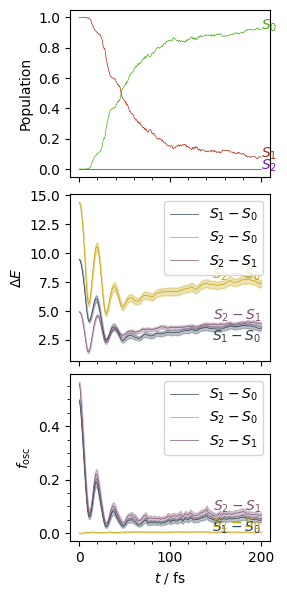

In [26]:
reload(time)
time.plot_timeplots(sheet.pops, sheet.delta_E, sheet.fosc_time)